In [111]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


![](https://raw.githubusercontent.com/UGS-CS/CSC3009/master/mashead.svg)

# <center>**Team 16**</center>

In [112]:
# import libaries
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict

## **1. Exploratory data analysis**

In [113]:
# Define paths
DATASET_PATH = "drive/MyDrive/dataset"

CLASSES = ['glioma', 'meningioma', 'notumor', 'pituitary']

Starting EDA on dataset at: drive/MyDrive/dataset

## 1. Class Distribution
---
Training Set Counts: {'glioma': 120, 'meningioma': 120, 'notumor': 120, 'pituitary': 120}
Test Set Counts: {'glioma': 120, 'meningioma': 120, 'notumor': 120, 'pituitary': 120}


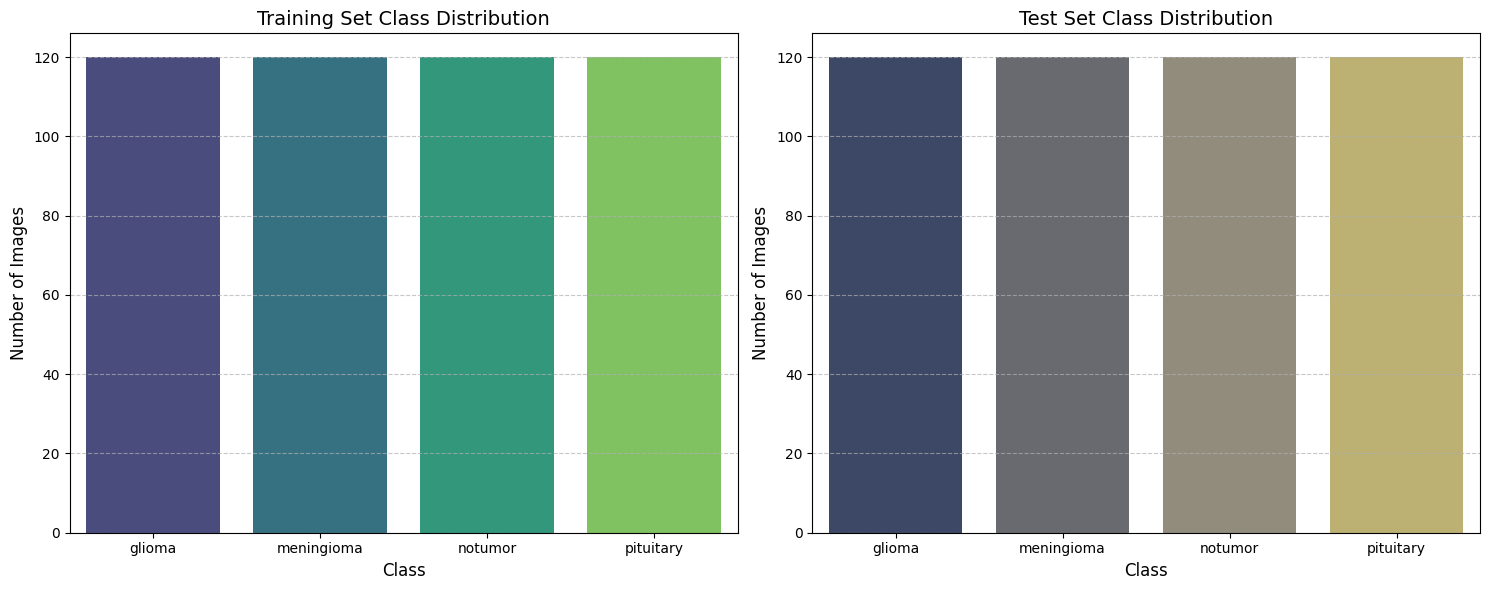


## 2. Image Size Analysis
---
  Processing image sizes for: training/glioma
  Processing image sizes for: training/meningioma
  Processing image sizes for: training/notumor
  Processing image sizes for: training/pituitary
  Processing image sizes for: test/glioma
  Processing image sizes for: test/meningioma
  Processing image sizes for: test/notumor
  Processing image sizes for: test/pituitary

Processed sizes for 960 images.

Image Size Summary (Height x Width):
            Height        Width
count   960.000000   960.000000
mean    452.014583   448.407292
std     124.663835   129.302499
min     168.000000   150.000000
25%     435.250000   414.500000
50%     512.000000   512.000000
75%     512.000000   512.000000
max    1019.000000  1149.000000


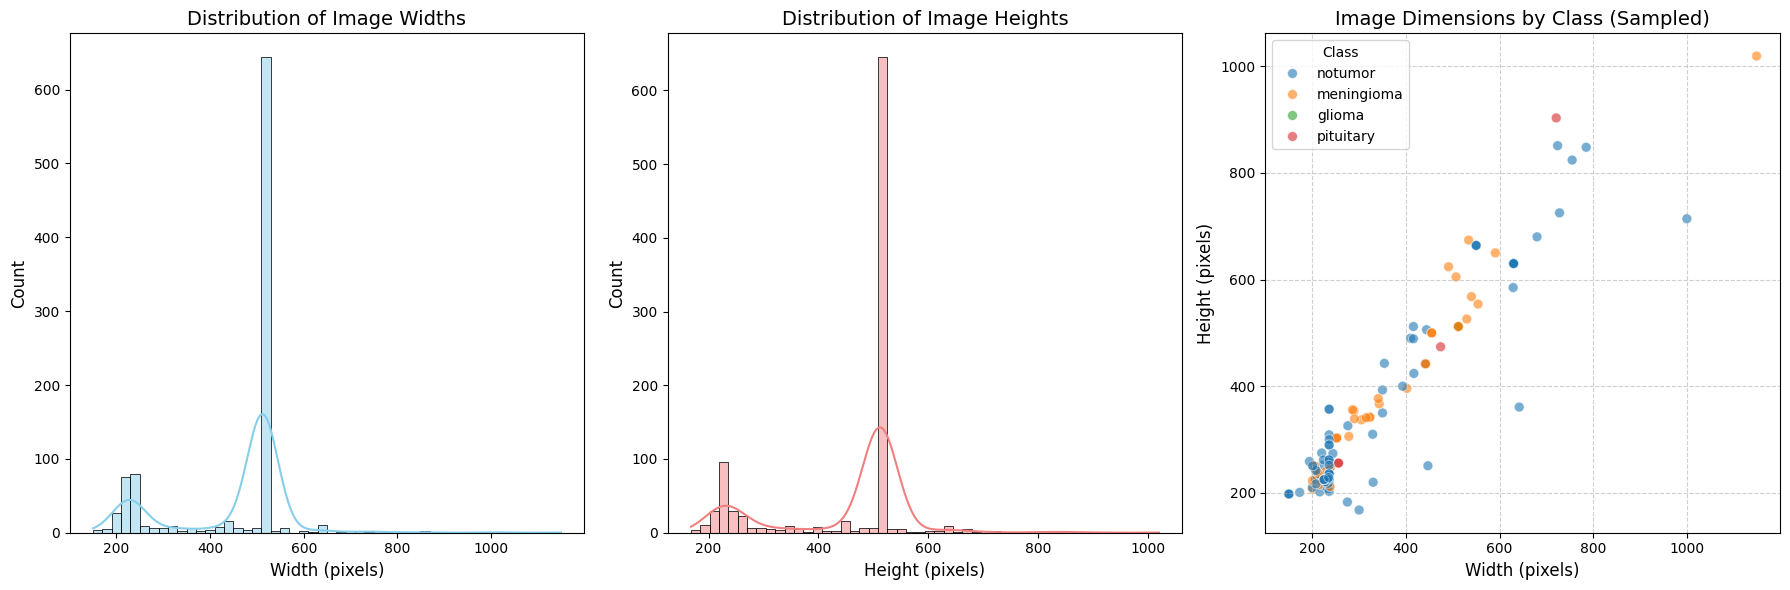

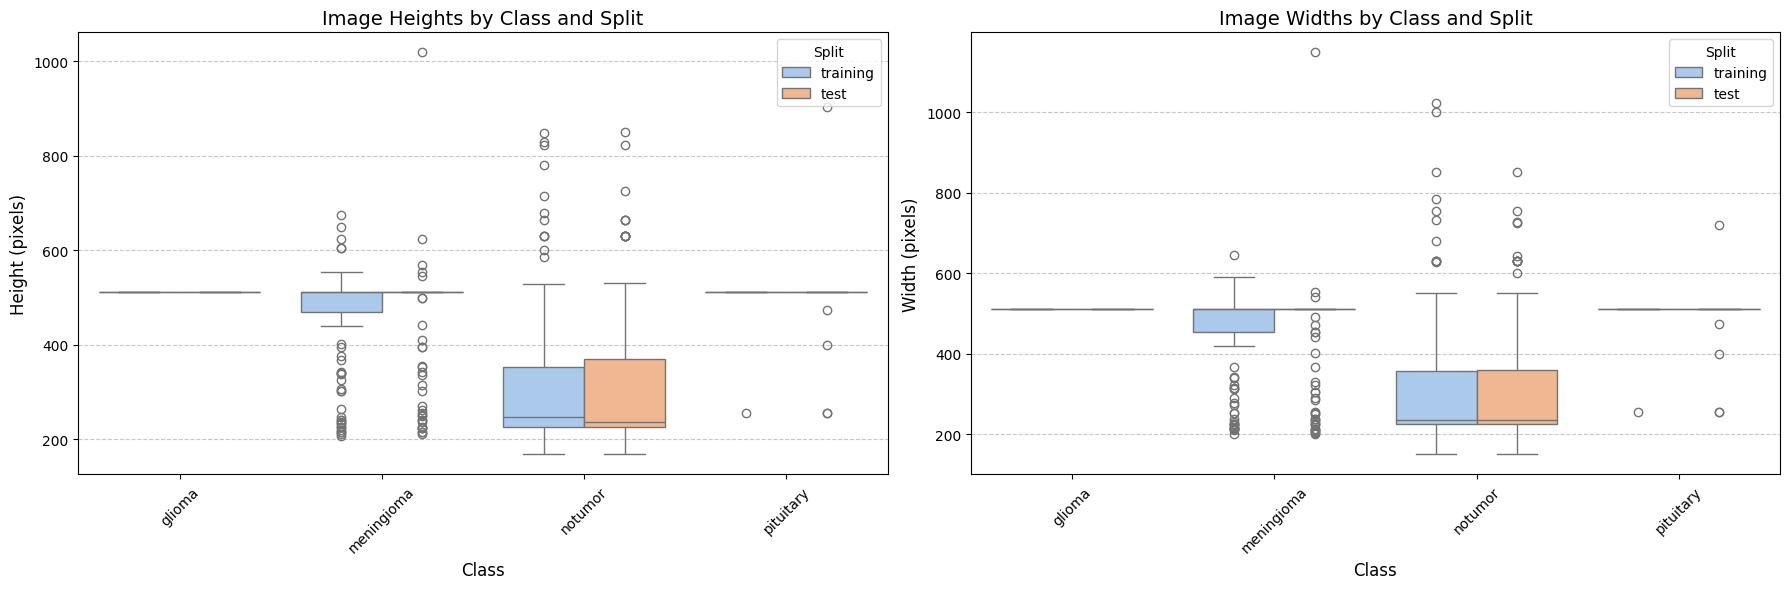


## 3. Image Overlap Check
---
  Attempting to list image IDs from: drive/MyDrive/dataset/training/dataset_16/glioma
    Found 120 unique IDs for training_glioma
  Attempting to list image IDs from: drive/MyDrive/dataset/training/dataset_16/meningioma
    Found 120 unique IDs for training_meningioma
  Attempting to list image IDs from: drive/MyDrive/dataset/training/dataset_16/notumor
    Found 120 unique IDs for training_notumor
  Attempting to list image IDs from: drive/MyDrive/dataset/training/dataset_16/pituitary
    Found 120 unique IDs for training_pituitary
  Attempting to list image IDs from: drive/MyDrive/dataset/test/glioma
    Found 120 unique IDs for test_glioma
  Attempting to list image IDs from: drive/MyDrive/dataset/test/meningioma
    Found 120 unique IDs for test_meningioma
  Attempting to list image IDs from: drive/MyDrive/dataset/test/notumor
    Found 120 unique IDs for test_notumor
  Attempting to list image IDs from: drive/MyDrive/dataset/test/pituitary
    Found

In [114]:
def eda_analysis():
    print(f"Starting EDA on dataset at: {DATASET_PATH}\n")

    # --- 1. Class Distribution ---
    print("## 1. Class Distribution")
    print("---")
    train_counts = {}
    test_counts = {}

    for cls in CLASSES:
        train_path = os.path.join(DATASET_PATH, 'training', 'dataset_16', cls)
        test_path = os.path.join(DATASET_PATH, 'test', cls) # Assuming no 'dataset_16' for test

        if os.path.exists(train_path):
            train_counts[cls] = len(os.listdir(train_path))
        else:
            print(f"Warning: Training directory not found for {cls}: {train_path}")
            train_counts[cls] = 0

        if os.path.exists(test_path):
            test_counts[cls] = len(os.listdir(test_path))
        else:
            print(f"Warning: Test directory not found for {cls}: {test_path}")
            test_counts[cls] = 0

    print("Training Set Counts:", train_counts)
    print("Test Set Counts:", test_counts)

    # Visualization for Class Distribution
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='viridis', hue=list(train_counts.keys()), legend=False)
    plt.title("Training Set Class Distribution", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2)
    sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette='cividis', hue=list(test_counts.keys()), legend=False)
    plt.title("Test Set Class Distribution", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # --- 2. Image Size Analysis ---
    print("\n## 2. Image Size Analysis")
    print("---")
    size_stats = defaultdict(list) # Stores (height, width) tuples
    total_images_processed = 0

    for split in ['training', 'test']:
        for cls in CLASSES:
            current_image_dir = ""
            if split == 'training':
                current_image_dir = os.path.join(DATASET_PATH, split, 'dataset_16', cls)
            elif split == 'test':
                # CONFIRM THIS PATH FOR TEST SET:
                current_image_dir = os.path.join(DATASET_PATH, split, cls)
                # If test also has 'dataset_16':
                # current_image_dir = os.path.join(DATASET_PATH, split, 'dataset_16', cls)

            print(f"  Processing image sizes for: {split}/{cls}")
            if not os.path.exists(current_image_dir):
                print(f"    Warning: Directory not found: {current_image_dir}. Skipping.")
                continue

            for img_name in os.listdir(current_image_dir):
                img_path = os.path.join(current_image_dir, img_name)
                if os.path.isfile(img_path): # Ensure it's a file
                    try:
                        img_raw = tf.io.read_file(img_path)
                        img_tensor = tf.image.decode_image(img_raw, channels=3)

                        if len(img_tensor.shape) >= 2: # Ensure it has at least height and width
                             size_stats[f"{split}_{cls}"].append((img_tensor.shape[0], img_tensor.shape[1]))
                        else:
                            print(f"    Warning: Unexpected shape for image {img_name}: {img_tensor.shape}. Skipping.")

                        total_images_processed += 1
                    except tf.errors.InvalidArgumentError as e:
                        print(f"    Warning: Could not decode image {img_name} in {split}/{cls}. Error: {e}")
                    except Exception as e:
                        print(f"    Warning: Error processing {img_name} in {split}/{cls}. Error: {e}")

    print(f"\nProcessed sizes for {total_images_processed} images.")

    # Analyze and visualize sizes
    all_widths = []
    all_heights = []

    # Convert size stats to a DataFrame for easier plotting
    size_df_data = []
    for key, sizes_list in size_stats.items():
        split_name, class_name = key.split('_')
        for h, w in sizes_list:
            size_df_data.append({'Split': split_name, 'Class': class_name, 'Height': h, 'Width': w})
            all_widths.append(w)
            all_heights.append(h)

    if size_df_data:
        size_df = pd.DataFrame(size_df_data)

        print("\nImage Size Summary (Height x Width):")
        print(size_df[['Height', 'Width']].describe())

        plt.figure(figsize=(18, 6))

        plt.subplot(1, 3, 1)
        sns.histplot(all_widths, bins=50, kde=True, color='skyblue')
        plt.title("Distribution of Image Widths", fontsize=14)
        plt.xlabel("Width (pixels)", fontsize=12)
        plt.ylabel("Count", fontsize=12)

        plt.subplot(1, 3, 2)
        sns.histplot(all_heights, bins=50, kde=True, color='lightcoral')
        plt.title("Distribution of Image Heights", fontsize=14)
        plt.xlabel("Height (pixels)", fontsize=12)
        plt.ylabel("Count", fontsize=12)

        plt.subplot(1, 3, 3)
        # Sample for scatter plot if too many points
        sample_df = size_df.sample(min(500, len(size_df))) if len(size_df) > 500 else size_df
        sns.scatterplot(data=sample_df, x='Width', y='Height', hue='Class', alpha=0.6, s=50, palette='tab10')
        plt.title("Image Dimensions by Class (Sampled)", fontsize=14)
        plt.xlabel("Width (pixels)", fontsize=12)
        plt.ylabel("Height (pixels)", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

        # Box plot for sizes by class
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(data=size_df, x='Class', y='Height', hue='Split', palette='pastel')
        plt.title("Image Heights by Class and Split", fontsize=14)
        plt.xlabel("Class", fontsize=12)
        plt.ylabel("Height (pixels)", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.subplot(1, 2, 2)
        sns.boxplot(data=size_df, x='Class', y='Width', hue='Split', palette='pastel')
        plt.title("Image Widths by Class and Split", fontsize=14)
        plt.xlabel("Class", fontsize=12)
        plt.ylabel("Width (pixels)", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    else:
        print("No image size data collected. Ensure paths are correct and images are present.")


    # --- 3. Image Overlap Check ---
    print("\n## 3. Image Overlap Check")
    print("---")
    image_ids = {} # Stores sets of IDs for each split_class combination

    for split in ['training', 'test']:
        for cls in CLASSES:
            current_image_dir = ""
            if split == 'training':
                current_image_dir = os.path.join(DATASET_PATH, split, 'dataset_16', cls)
            elif split == 'test':
                # CONFIRM THIS PATH FOR TEST SET:
                current_image_dir = os.path.join(DATASET_PATH, split, cls)
                # If test also has 'dataset_16':
                # current_image_dir = os.path.join(DATASET_PATH, split, 'dataset_16', cls)

            print(f"  Attempting to list image IDs from: {current_image_dir}")

            if os.path.exists(current_image_dir):
                ids = set()
                try:
                    for f in os.listdir(current_image_dir):
                        file_path = os.path.join(current_image_dir, f)
                        if os.path.isfile(file_path):
                            # CORRECTED LINE: Use the full filename without extension as the ID
                            ids.add(os.path.splitext(f)[0])
                except Exception as e:
                    print(f"    Error listing files in {current_image_dir}: {e}")
                    ids = set()

                image_ids[f"{split}_{cls}"] = ids
                print(f"    Found {len(ids)} unique IDs for {split}_{cls}")
            else:
                print(f"    Warning: Directory not found for image ID check: {current_image_dir}. Skipping {split}/{cls}.")
                image_ids[f"{split}_{cls}"] = set()


    # --- 4. Missing or Corrupted Image Check ---
    print("\n## 4. Missing or Corrupted Image Check")
    print("---")
    missing_or_corrupted = defaultdict(list)

    for split in ['training', 'test']:
        for cls in CLASSES:
            current_image_dir = ""
            if split == 'training':
                current_image_dir = os.path.join(DATASET_PATH, split, 'dataset_16', cls)
            elif split == 'test':
                current_image_dir = os.path.join(DATASET_PATH, split, cls)

            if not os.path.exists(current_image_dir):
                print(f"  Skipping {split}/{cls} - directory does not exist.")
                continue

            print(f"  Checking images in: {split}/{cls}")
            for img_name in os.listdir(current_image_dir):
                img_path = os.path.join(current_image_dir, img_name)
                if os.path.isfile(img_path):
                    try:
                        img_raw = tf.io.read_file(img_path)
                        _ = tf.image.decode_image(img_raw, channels=3)
                    except Exception as e:
                        missing_or_corrupted[f"{split}_{cls}"].append((img_name, str(e)))

    # Report corrupted images
    total_missing = sum(len(v) for v in missing_or_corrupted.values())
    print(f"\nTotal missing or corrupted images: {total_missing}")

    if total_missing > 0:
        for key, problems in missing_or_corrupted.items():
            print(f"\n  {key} - {len(problems)} issues")
            for filename, error in problems[:5]:  # Show up to 5 per class
                print(f"    {filename}: {error}")
        print("\n  **WARNING: Some images are unreadable or corrupted. Consider removing or replacing them.**")
    else:
        print("  ✅ All images are readable. No missing or corrupted files detected.")


    # --- Compare Training and Test Sets for Overall Overlap ---
    print("\n--- Comparing Training and Test Sets for Overall Overlap ---")

    all_train_ids = set()
    for cls in CLASSES:
        all_train_ids.update(image_ids.get(f"training_{cls}", set()))

    all_test_ids = set()
    for cls in CLASSES:
        all_test_ids.update(image_ids.get(f"test_{cls}", set()))

    overall_overlap = all_train_ids.intersection(all_test_ids)

    print(f"Total unique IDs in Training Set: {len(all_train_ids)}")
    print(f"Total unique IDs in Test Set:     {len(all_test_ids)}")
    print(f"Total unique IDs overlapping between Training and Test Sets: {len(overall_overlap)}")

    if len(overall_overlap) > 0:
        print(f"  Example overlapping IDs: {list(overall_overlap)[:5]} (showing up to 5 examples)")
        print("\n  **WARNING: OVERLAP DETECTED!** This means some images (or their direct variations) are present in both training and test sets.")
        print("  This can lead to **overly optimistic model performance metrics** during evaluation.")
        print("  Consider re-splitting your dataset to ensure strict separation between training and test data if this is unintentional.")
    else:
        print("  No overlap detected between training and test sets. This is ideal for robust model evaluation.")

    print("\nEDA Complete!")

# Execute the analysis
# Remember to mount Google Drive if you are in Colab:
# from google.colab import drive
# drive.mount('/content/drive')
eda_analysis()

Found 480 files belonging to 4 classes.
Found 480 files belonging to 4 classes.
Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']

🔍 Training Batch Shape:
Images shape: (32, 224, 224, 3)
Labels shape: (32,)

First Image Shape: (224, 224, 3)
First Image Pixel Values (as uint8):
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Class index of first image: 0


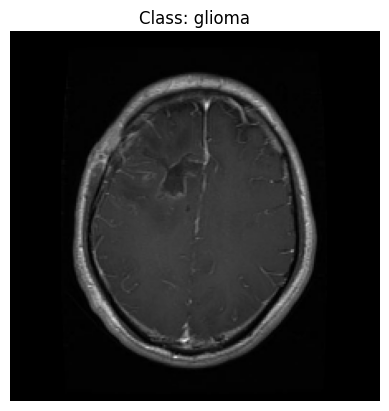

In [115]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os # Import os module to use os.path.join

# Load datasets
# Define paths
# Correct the DATASET_PATH to point to the root of your dataset on Google Drive
DATASET_PATH = "drive/MyDrive/dataset"

CLASSES = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Use os.path.join with the DATASET_PATH variable
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "training", "dataset_16"),
    image_size=(224, 224),   # You can change this size
    batch_size=32,
    shuffle=False
)

# Update the test path as well to use DATASET_PATH
test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "test"), # Assuming the test data is directly under 'test'
    image_size=(224, 224),
    batch_size=32
)

# View class names
print("Class names:", train_ds.class_names)

# Inspect one batch from training dataset
for images, labels in train_ds.take(1):
    print("\n🔍 Training Batch Shape:")
    print("Images shape:", images.shape)  # (batch_size, height, width, channels)
    print("Labels shape:", labels.shape)

    # Get first image
    image = images[0].numpy()
    label = labels[0].numpy()

    print("\nFirst Image Shape:", image.shape)
    print("First Image Pixel Values (as uint8):")
    print(image.astype(np.uint8))  # You can also use np.round(image) for cleaner output
    print("Class index of first image:", label)
    break


# Display the first image
plt.imshow(image.astype("uint8"))  # Convert to uint8 for proper color rendering
plt.title(f"Class: {train_ds.class_names[label]}")
plt.axis("off")
plt.show()



Check images with no pixel variation (potentially blank)

In [116]:
import numpy as np

def check_blank_images(dataset):
    blank_count = 0
    total = 0
    for image_batch, label_batch in dataset:
        for img in image_batch:
            total += 1
            if np.std(img.numpy()) == 0:  # All pixels same
                blank_count += 1
    print(f"Blank images: {blank_count}/{total}")
check_blank_images(train_ds)

Blank images: 0/480


## **2. Data preparation and pre-processing**

### Create Metadata File

In [117]:
import os
import pandas as pd

def prepare_metadata_table(dataset_dir, class_names, id_delimiter='_', id_parts=2, image_extensions={'.jpg', '.jpeg', '.png'}):
    """
    Prepares metadata table with renamed class labels.

    Args:
        dataset_dir (str): Path to dataset folder
        class_names (list): Target class names, used in order
        id_delimiter (str): Delimiter for parsing ID from filename
        id_parts (int): Number of parts to keep from split filename
        image_extensions (set): Acceptable image file extensions

    Returns:
        pd.DataFrame: Metadata table with columns: path, label, id
    """
    data = []
    subfolders = sorted(os.listdir(dataset_dir))  # Assumes order matches class_names
    class_map = {orig: new for orig, new in zip(subfolders, class_names)}

    for folder in subfolders:
        folder_path = os.path.join(dataset_dir, folder)
        if not os.path.isdir(folder_path):
            continue

        label = class_map.get(folder)
        if label is None:
            continue

        for filename in os.listdir(folder_path):
            ext = os.path.splitext(filename)[1].lower()
            if ext not in image_extensions:
                continue

            full_path = os.path.join(folder_path, filename)

            name_wo_ext = os.path.splitext(filename)[0]
            id_parts_split = name_wo_ext.split(id_delimiter)[:id_parts]
            unique_id = id_delimiter.join(id_parts_split)

            data.append({
                'path': full_path,
                'label': label,
                'id': unique_id
            })

    df = pd.DataFrame(data)
    print(f"✅ Metadata table created with {len(df)} entries.")
    print(df.head())
    return df


In [118]:
DATASET_PATH_TRAIN = "drive/MyDrive/dataset/training/dataset_16"
DATASET_PATH_TEST = "drive/MyDrive/dataset/test"  # Corrected the directory name from 'testing' to 'test'
CLASSES = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Assuming folder names are already correct (e.g., "glioma", "pituitary"), no mapping is needed
train_df = prepare_metadata_table(DATASET_PATH_TRAIN, CLASSES)
test_df = prepare_metadata_table(DATASET_PATH_TEST, CLASSES)

✅ Metadata table created with 480 entries.
                                                path   label          id
0  drive/MyDrive/dataset/training/dataset_16/glio...  glioma  Tr-gl_0109
1  drive/MyDrive/dataset/training/dataset_16/glio...  glioma  Te-gl_0129
2  drive/MyDrive/dataset/training/dataset_16/glio...  glioma  Tr-gl_0120
3  drive/MyDrive/dataset/training/dataset_16/glio...  glioma  Te-gl_0079
4  drive/MyDrive/dataset/training/dataset_16/glio...  glioma  Te-gl_0178
✅ Metadata table created with 480 entries.
                                               path   label          id
0  drive/MyDrive/dataset/test/glioma/Te-gl_0170.jpg  glioma  Te-gl_0170
1  drive/MyDrive/dataset/test/glioma/Te-gl_0167.jpg  glioma  Te-gl_0167
2  drive/MyDrive/dataset/test/glioma/Tr-gl_0107.jpg  glioma  Tr-gl_0107
3  drive/MyDrive/dataset/test/glioma/Tr-gl_0277.jpg  glioma  Tr-gl_0277
4  drive/MyDrive/dataset/test/glioma/Tr-gl_0061.jpg  glioma  Tr-gl_0061


### Check the number of duplicates IDs in both the training and testing datatsets

In [119]:
# Correct cross-dataset overlap check
train_ids = set(train_df['id'])
test_ids = set(test_df['id'])

overlap_ids = train_ids.intersection(test_ids)
print(f"⚠️ Correct overlapping IDs between train and test: {len(overlap_ids)}")
if overlap_ids:
    print("Examples of overlapping IDs:", list(overlap_ids)[:5])

# Optional: show full rows for these overlapping IDs
if overlap_ids:
    overlap_df_train = train_df[train_df['id'].isin(overlap_ids)]
    overlap_df_test = test_df[test_df['id'].isin(overlap_ids)]
    print("\n🔁 In Training Set:")
    print(overlap_df_train[['id', 'path', 'label']].sort_values('id'))
    print("\n🔁 In Testing Set:")
    print(overlap_df_test[['id', 'path', 'label']].sort_values('id'))


⚠️ Correct overlapping IDs between train and test: 75
Examples of overlapping IDs: ['Te-gl_0170', 'Tr-me_0219', 'Tr-no_0185', 'Te-gl_0178', 'Te-no_0159']

🔁 In Training Set:
             id                                               path      label
21   Te-gl_0064  drive/MyDrive/dataset/training/dataset_16/glio...     glioma
45   Te-gl_0112  drive/MyDrive/dataset/training/dataset_16/glio...     glioma
1    Te-gl_0129  drive/MyDrive/dataset/training/dataset_16/glio...     glioma
10   Te-gl_0134  drive/MyDrive/dataset/training/dataset_16/glio...     glioma
57   Te-gl_0167  drive/MyDrive/dataset/training/dataset_16/glio...     glioma
..          ...                                                ...        ...
384  Tr-pi_0213  drive/MyDrive/dataset/training/dataset_16/pitu...  pituitary
415  Tr-pi_0227  drive/MyDrive/dataset/training/dataset_16/pitu...  pituitary
380  Tr-pi_0342  drive/MyDrive/dataset/training/dataset_16/pitu...  pituitary
387  Tr-pi_0386  drive/MyDrive/dataset/trainin

### Remove duplicate IDs in testing dataset

In [120]:
# Get sets of IDs in train and test
train_ids = set(train_df['id'])
test_ids = set(test_df['id'])

# Find overlap IDs
overlap_ids = train_ids.intersection(test_ids)
print(f"Overlapping IDs count: {len(overlap_ids)}")

# Drop overlapping IDs from test set
test_df_clean = test_df[~test_df['id'].isin(overlap_ids)].reset_index(drop=True)

print(f"Original test set size: {len(test_df)}")
print(f"Cleaned test set size (no overlaps): {len(test_df_clean)}")


Overlapping IDs count: 75
Original test set size: 480
Cleaned test set size (no overlaps): 405


### Split Images by Unique IDs

Ensure Class Balance by using GroupKFold or GroupShuffleSplit from scikit-learn

In [121]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

# Load metadata table
df = pd.concat([train_df, test_df], ignore_index=True)  # ✅ Combine metadata tables for group-based split

# 80% train, 20% test
splitter = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
train_idx, test_idx = next(splitter.split(df, groups=df['id'], y=df['label']))

train_df = df.iloc[train_idx]
test_df = df.iloc[test_idx]

# Check balance
print("Train label distribution:\n", train_df['label'].value_counts(normalize=True))
print("Test label distribution:\n", test_df['label'].value_counts(normalize=True))

# Check no overlap
print("Overlap:", set(train_df['id']).intersection(set(test_df['id'])))  # Should be empty


Train label distribution:
 label
notumor       0.265201
pituitary     0.252264
glioma        0.249677
meningioma    0.232859
Name: proportion, dtype: float64
Test label distribution:
 label
meningioma    0.320856
glioma        0.251337
pituitary     0.240642
notumor       0.187166
Name: proportion, dtype: float64
Overlap: set()


In [127]:
print("Train dataset shape:", train_df.shape)  # (number_of_rows, number_of_columns)
print("Test dataset shape:", test_df.shape)


Train dataset shape: (773, 3)
Test dataset shape: (187, 3)


### Check the class split

In [128]:
# Count samples per class in training set
print("Training set class distribution:")
print(train_df['label'].value_counts())

# Count samples per class in test set
print("\nTest set class distribution:")
print(test_df['label'].value_counts())


Training set class distribution:
label
notumor       205
pituitary     195
glioma        193
meningioma    180
Name: count, dtype: int64

Test set class distribution:
label
meningioma    60
glioma        47
pituitary     45
notumor       35
Name: count, dtype: int64


###Standardize Image Sizes
To have all images same size and pixels to ensure consistency in the data.

In [122]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)  # Standard size for CNNs
BATCH_SIZE = 32  # Number of images per batch

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixels to [0,1]
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'training', 'dataset_16'),
    target_size=IMG_SIZE,  # Resize to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # For multi-class classification
    classes=CLASSES  # Ensure correct class order
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False  # Keep order for evaluation
)

#target_size=IMG_SIZE resizes all images to 224x224.
#rescale=1./255 normalizes pixel values from [0,255] to [0,1], which is standard for neural networks.
#class_mode='categorical' creates one-hot encoded labels (e.g., [1,0,0,0] for glioma).
#classes=CLASSES ensures consistent label order.

#Check the output of train_generator and test_generator to confirm the number of images loaded matches train_counts and test_counts from the EDA

Found 480 images belonging to 4 classes.
Found 480 images belonging to 4 classes.


###Handle Class Imbalance
Check if theres a mismatch in counts according to eda. If a class has more, the weights should be adjusted. In this case, all classes are equal hence weights are all 1.0.

In [123]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

train_counts = {'glioma': 120, 'meningioma': 120, 'notumor': 120, 'pituitary': 120}
class_names = list(train_counts.keys())
class_counts = list(train_counts.values())

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array(class_names),
    y=np.repeat(class_names, class_counts)
)
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weight_dict)

Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0)}


### Data Augmentation
Apply data augmentation to the training set to increase dataset diversity and prevent overfitting. This is especially important for medical imaging tasks like brain tumor classification, where data may be limited.

In [124]:
# Augmentation creates varied versions of training images (e.g., rotated or flipped) to make the model more robust.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotate images up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20%
    height_shift_range=0.2,  # Shift images vertically by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    zoom_range=0.2,  # Random zoom
    fill_mode='nearest'  # Fill missing pixels
)

# Update train_generator with augmentation
train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'training', 'dataset_16'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Test generator remains the same (no augmentation)
test_generator = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False
)


Found 480 images belonging to 4 classes.
Found 480 images belonging to 4 classes.


### Verify Preprocessed Data

Training images: 480
Test images: 480
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


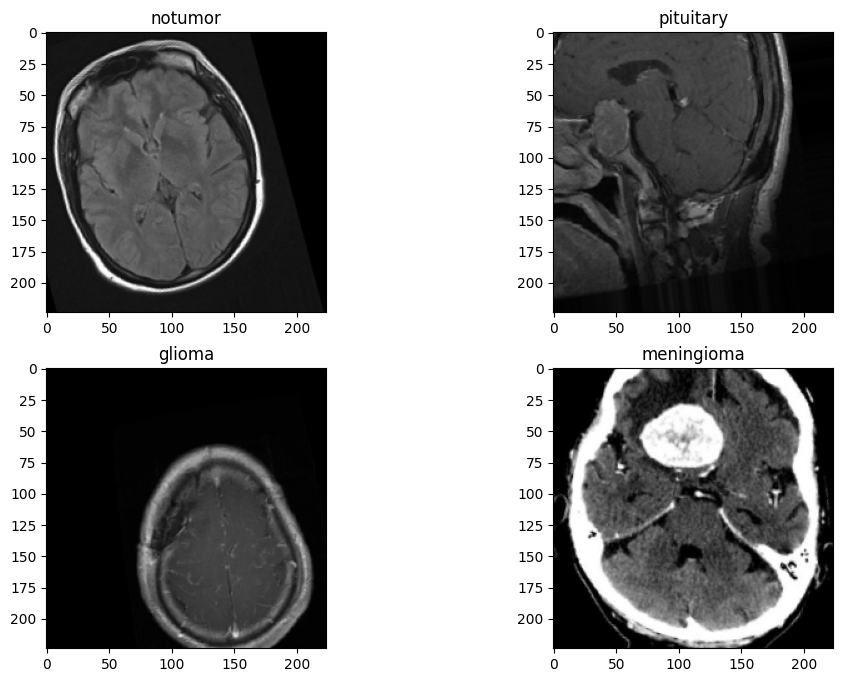

In [125]:
print(f"Training images: {train_generator.samples}")
print(f"Test images: {test_generator.samples}")
print(f"Class indices: {train_generator.class_indices}")

# Visualize a batch
x, y = next(train_generator)
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(x[i])
    plt.title(CLASSES[np.argmax(y[i])])
plt.show()

#<font color=lightgreen> TESTING ONLY </font>

In [126]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(len(CLASSES), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    class_weight=class_weight_dict
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2864 - loss: 1.4735 - val_accuracy: 0.2438 - val_loss: 1.4425
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 772ms/step - accuracy: 0.3351 - loss: 1.3394 - val_accuracy: 0.3792 - val_loss: 1.2100
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 770ms/step - accuracy: 0.4401 - loss: 1.1978 - val_accuracy: 0.4292 - val_loss: 1.2001
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 759ms/step - accuracy: 0.3647 - loss: 1.2746 - val_accuracy: 0.4646 - val_loss: 1.1791
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 774ms/step - accuracy: 0.4644 - loss: 1.1702 - val_accuracy: 0.4833 - val_loss: 1.1870
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 861ms/step - accuracy: 0.4344 - loss: 1.1956 - val_accuracy: 0.5375 - val_loss: 1.1361
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 686ms/step - accuracy: 0.4615 - loss: 1.1527 - val_accuracy: 0.5458 - val_loss: 1.1057
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 768ms/step - accuracy: 0.4587 - loss: 1.1313 - val_accurac